In [1]:
import numpy as np
import keras
from keras import layers

# 题目：MLP实现图像多分类（手写数字识别）
## 实验目的与环境

目的

- 基于mnist数据集，建立MLP模型

- 使用模型实现0-9数字的十分类

In [5]:
#load the dataset
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(type(X_train),X_train.shape)


<class 'numpy.ndarray'> (60000, 28, 28)


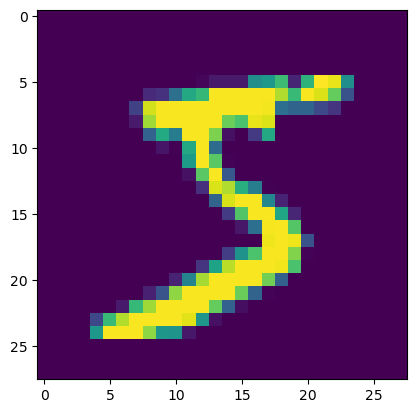

In [7]:
# visualize the data
import matplotlib.pyplot as plt
import numpy as np

img1 = X_train[0]
fig1 = plt.figure()
plt.imshow(img1)
plt.show()

In [17]:
from tensorflow import keras

num_classes = 10
input_shape = (28, 28, 1)
feature_size = img1.shape[0] * img1.shape[1] 
print("feature_size", feature_size)

# format input data
X_train_normal = X_train.reshape(X_train.shape[0], feature_size).astype('float32') / 255.0
X_test_normal = X_test.reshape(X_test.shape[0], feature_size).astype('float32') / 255.0

# convert class vectors to binary class matrices
y_train_format = keras.utils.to_categorical(y_train, num_classes)
y_test_format = keras.utils.to_categorical(y_test, num_classes)

print("X_train_normal shape:", X_train_normal.shape)
print(X_train_normal[1])

feature_size 784
X_train_normal shape: (60000, 784)
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0. 

In [ ]:
# set up the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Input
mlp = Sequential()
mlp.add(Input(shape=(feature_size,)))
mlp.add(Dense(392, activation='sigmoid'))
mlp.add(Dense(392, activation='sigmoid'))
mlp.add(Dense(10, activation='softmax'))
mlp.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 392)            │       307,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 392)            │       154,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         3,930 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 465,706 (1.78 MB)

 Trainable params: 465,706 (1.78 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
# configure the model
mlp.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [20]:
mlp.fit(X_train_normal,y_train_format,epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8169 - loss: 0.6190
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9516 - loss: 0.1586
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9707 - loss: 0.0978
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9798 - loss: 0.0648
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9849 - loss: 0.0484
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9883 - loss: 0.0346
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9912 - loss: 0.0270
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9941 - loss: 0.0183
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9961 - loss: 0.0129
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9952 - loss: 0.0142


In [21]:
score = mlp.evaluate(X_test_normal, y_test_format, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.07111591100692749
Test accuracy: 0.9810000061988831


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


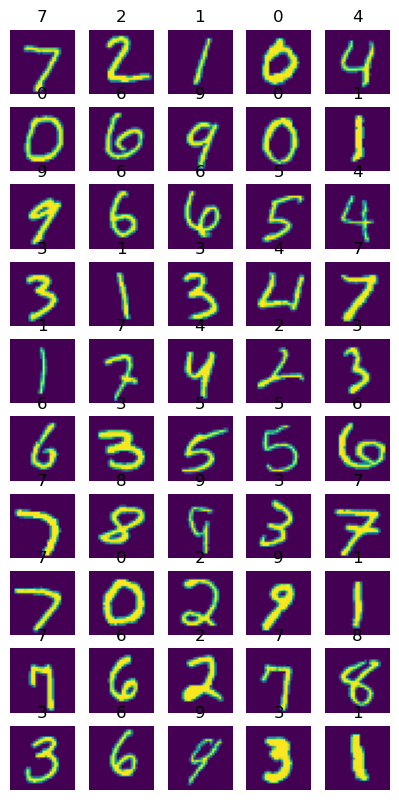

In [36]:
y_test_predict = mlp.predict(X_test_normal)
y_test_predict = np.argmax(y_test_predict, axis=1)

# 绘制预测结果
fig1 = plt.figure(figsize=(10,40))
for i in range(10):
    for j in range(5):
        index = i*10+j
        img = X_test[index]
        value = y_test_predict[index]
        plt.subplot(40,10,index+1)
        plt.title(value)
        plt.imshow(img)
        plt.axis('off')


